In [1]:
import warnings
warnings.filterwarnings('ignore')

import io
import base64
import pandas as pd

from IPython.core.display import display, HTML
from PIL import Image

In [2]:
output = !python deep-text-recognition-benchmark/demo.py --demo_conf mn_conf/demo_parameters_conf.yaml

,img,id,label,conf
0,,D:/Ground/BolorSoft-OCR/mn_recognition_data/val_small/img0.jpg,гялтгар,0.9485
1,,D:/Ground/BolorSoft-OCR/mn_recognition_data/val_small/img1.jpg,зулгааснаар,0.7022
2,,D:/Ground/BolorSoft-OCR/mn_recognition_data/val_small/img2.jpg,өрорн,0.7749
3,,D:/Ground/BolorSoft-OCR/mn_recognition_data/val_small/img3.jpg,тусаамжаас,0.0550
4,,D:/Ground/BolorSoft-OCR/mn_recognition_data/val_small/img4.jpg,тээвэрлэгчийг,0.3540
5,,D:/Ground/BolorSoft-OCR/mn_recognition_data/val_small/img5.jpg,хайгуулаа,0.8976
6,,D:/Ground/BolorSoft-OCR/mn_recognition_data/val_small/img6.jpg,хийсж,0.5821
7,,D:/Ground/BolorSoft-OCR/mn_recognition_data/val_small/img7.jpg,хэтрүүлэхгүйн,0.5443
8,,D:/Ground/BolorSoft-OCR/mn_recognition_data/val_small/img8.jpg,хүүрнэх,0.9879
9,,D:/Ground/BolorSoft-OCR/mn_recognition_data/val_small/img9.jpg,өөгшүүлсэн,0.5024

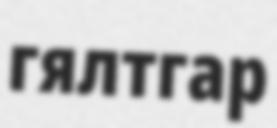
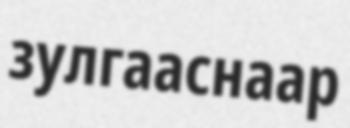
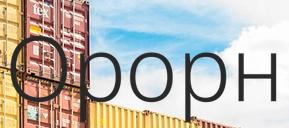
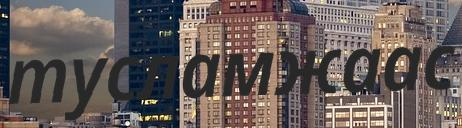
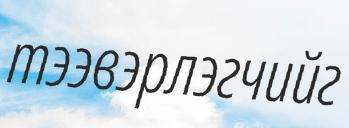
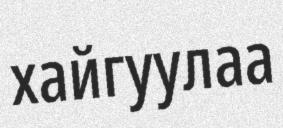
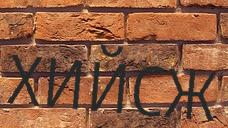
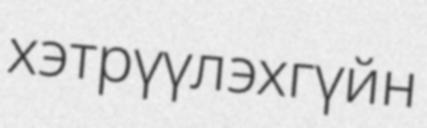
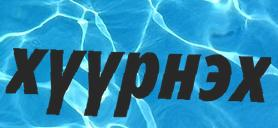
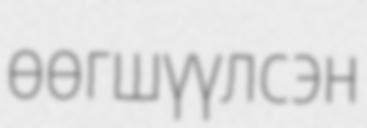

In [3]:
data = pd.DataFrame()

for ind, row in enumerate(output[output.index('image_path               \tpredicted_labels         \tconfidence score')+2:]):
  row = row.split('\t')
  filename = row[0].strip()
  label = row[1].strip()
  conf = row[2].strip()

  img = Image.open(filename)
  img_buffer = io.BytesIO()
  img.save(img_buffer, format="PNG")
  imgStr = base64.b64encode(img_buffer.getvalue()).decode("utf-8") 

  data.loc[ind, 'img'] = '<img src = "data:image/png;base64,{0:s}">'.format(imgStr)
  data.loc[ind, 'id'] = filename
  data.loc[ind, 'label'] = label
  data.loc[ind, 'conf'] = conf

html_all = data.to_html(escape = False)
display(HTML(html_all))